## word2vec

[ref](https://github.com/headwinds/python-notebooks/blob/master/nlp/tensorflow-word2vec.ipynb)

In [38]:
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_eager_execution()

In [39]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

print(words)
words = set(words) # so that all duplicate words are removed
print(words)

['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']
{'queen', 'king', 'is', 'he', 'she', 'royal', 'the'}


In [40]:
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

print(word2int)
print()
print(int2word)
sentences

{'queen': 0, 'king': 1, 'is': 2, 'he': 3, 'she': 4, 'royal': 5, 'the': 6}

{0: 'queen', 1: 'king', 2: 'is', 3: 'he', 4: 'she', 5: 'royal', 6: 'the'}


[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [41]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [42]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train)
print()
print(y_train)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 

In [43]:
EMBEDDING_DIM = 5

def model():
    x = tf.placeholder(tf.float32, shape=(None, vocab_size))
    y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))
    W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
    b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
    
    hidden_representation = tf.add(tf.matmul(x, W1), b1)
    
    W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
    b2 = tf.Variable(tf.random_normal([vocab_size]))
    
    z = tf.add(tf.matmul(hidden_representation, W2), b2)
    
    predict = tf.nn.softmax(z)
    
    cross_entropy_loss = tf.reduce_mean(
        -tf.reduce_sum(y_label * tf.log(predict), reduction_indices=[1]))
    return x, y_label, predict, cross_entropy_loss, W1, b1
                             

In [44]:
n_iters = 10000
with tf.Session() as sess:
    x, y_label, predict, loss, W1, b1 = model()
    
    init = tf.global_variables_initializer()
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    feed_dict = {
        x: x_train,
        y_label: y_train
    }
    sess.run(init)
    for i in range(n_iters):
        _, loss_val = sess.run([train_step, loss], feed_dict)
        if (i % 500 == 0):
            print('Epoch %d loss is %4.3f' % (i, loss_val))
    
    print(sess.run(W1))
    print(sess.run(b1))
    vectors = sess.run(W1 + b1)

Epoch 0 loss is 5.232
Epoch 500 loss is 1.377
Epoch 1000 loss is 1.335
Epoch 1500 loss is 1.327
Epoch 2000 loss is 1.325
Epoch 2500 loss is 1.324
Epoch 3000 loss is 1.323
Epoch 3500 loss is 1.322
Epoch 4000 loss is 1.322
Epoch 4500 loss is 1.322
Epoch 5000 loss is 1.322
Epoch 5500 loss is 1.321
Epoch 6000 loss is 1.321
Epoch 6500 loss is 1.321
Epoch 7000 loss is 1.321
Epoch 7500 loss is 1.321
Epoch 8000 loss is 1.321
Epoch 8500 loss is 1.321
Epoch 9000 loss is 1.321
Epoch 9500 loss is 1.321
[[ 1.8528585   1.6174512   1.258438    0.28817225 -1.0668479 ]
 [-0.5379993   0.90102583  1.1329073  -0.44519413  0.7587993 ]
 [-0.54823804  1.3765346   0.531423    3.0392737  -0.06460135]
 [ 1.5491688  -1.0920565   1.992212   -0.3576851  -0.02183155]
 [-0.779871   -0.19996865  2.5206764  -0.5892549   0.57225513]
 [-2.298608   -2.3394256  -0.8665231   0.05630873  0.61125386]
 [ 1.3928018  -0.57235616 -1.1741842   0.7932451   2.5386894 ]]
[ 1.1257846  -1.0519121   1.7099932   0.65605074 -0.13203743]


In [ ]:

# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))


sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000
# train for n_iter iterations

for i in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    if (i % 500 == 0):
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

vectors = sess.run(W1 + b1)

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [45]:
# 看下 'queen' 单词的表示
print(vectors[word2int['queen']])

[ 2.9786432  0.5655391  2.9684312  0.944223  -1.1988853]


In [46]:

from sklearn.manifold import TSNE

print(vectors)

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[ 2.9786432   0.5655391   2.9684312   0.944223   -1.1988853 ]
 [ 0.58778536 -0.15088624  2.8429005   0.21085662  0.6267619 ]
 [ 0.5775466   0.3246225   2.2414162   3.6953244  -0.19663878]
 [ 2.6749535  -2.1439686   3.7022052   0.29836565 -0.15386899]
 [ 0.34591365 -1.2518808   4.2306695   0.06679583  0.4402177 ]
 [-1.1728234  -3.3913376   0.84347016  0.7123595   0.47921643]
 [ 2.5185864  -1.6242683   0.53580904  1.4492958   2.406652  ]]
[[ 0.20083235 -0.9796256 ]
 [-0.9999582  -0.00913954]
 [ 0.7678239  -0.640661  ]
 [-0.4945566  -0.8691454 ]
 [ 0.5028128  -0.86439526]
 [ 0.99960124  0.02823829]
 [ 0.4537208   0.89114386]]


{'queen', 'king', 'is', 'he', 'she', 'royal', 'the'}
queen -0.9796256
king -0.00913954
is -0.640661
he -0.8691454
she -0.86439526
royal 0.028238285
the 0.89114386


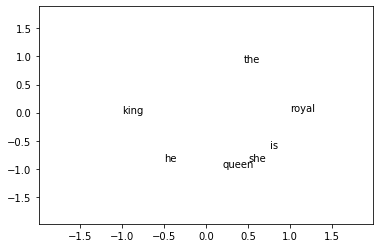

In [47]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()